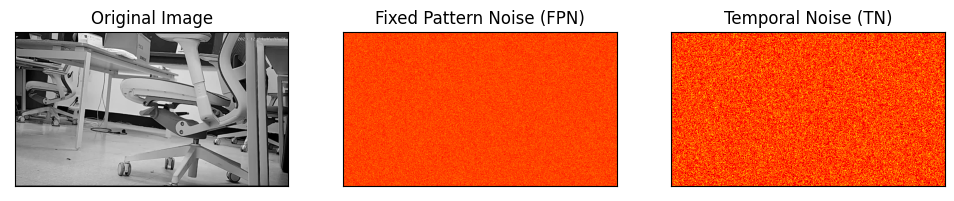

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_fpn_and_tn(image_path, num_frames=10):
    # 이미지 불러오기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지 크기
    rows, cols = image.shape

    # FPN 계산
    fpn_values = np.zeros((rows, cols))
    for _ in range(num_frames):
        # 노이즈 추가된 이미지 생성
        noisy_image = image + np.random.normal(0, 10, size=(rows, cols)).astype(np.uint8)
        fpn_values += np.abs(noisy_image - image) / num_frames

    # TN 계산
    tn_values = np.zeros((rows, cols))
    for i in range(1, num_frames):
        # 이전 프레임과의 차이 계산
        frame_diff = np.abs(image - noisy_image)
        tn_values += frame_diff / (i + 1)

    # 결과 시각화
    plt.figure(figsize=(12, 6))

    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(fpn_values, cmap='hot')
    plt.title('Fixed Pattern Noise (FPN)'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(tn_values, cmap='hot')
    plt.title('Temporal Noise (TN)'), plt.xticks([]), plt.yticks([])

    plt.show()

# 이미지 파일 경로 지정
image_path = './desktop/frame0002.jpg'

# FPN과 TN을 그래프로 그리기
calculate_fpn_and_tn(image_path)


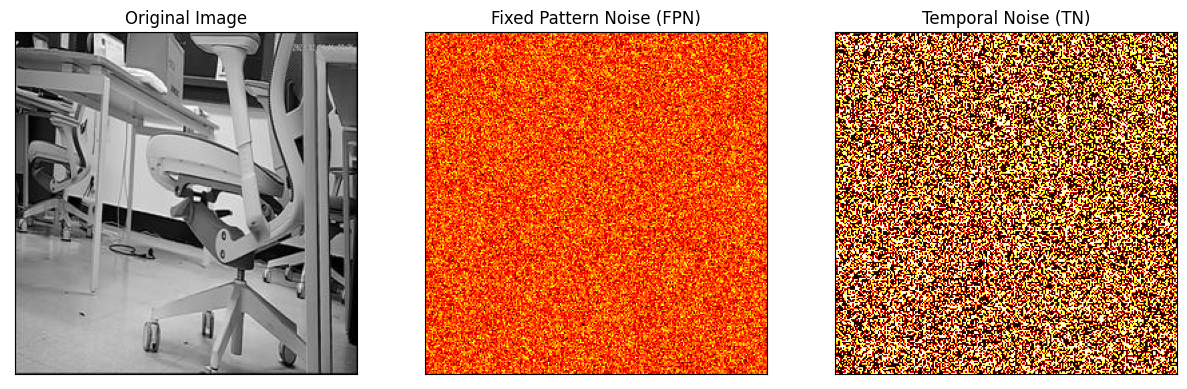

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_fpn_and_tn(image_path, num_frames=10):
    # 이미지 불러오기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지 크기
    rows, cols = image.shape

    # FPN 계산
    fpn_values = np.zeros((rows, cols))
    for _ in range(num_frames):
        # 노이즈 추가된 이미지 생성
        noisy_image = image + np.random.normal(0, 10, size=(rows, cols)).astype(np.uint8)
        fpn_values += np.abs(noisy_image - image) / num_frames

    # TN 계산
    tn_values = np.zeros((rows, cols))
    for i in range(1, num_frames):
        # 이전 프레임과의 차이 계산
        frame_diff = np.abs(image - noisy_image)
        tn_values += frame_diff / (i + 1)

    # 결과 시각화
    plt.figure(figsize=(15, 5))

    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(fpn_values, cmap='hot')
    plt.title('Fixed Pattern Noise (FPN)'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(tn_values, cmap='hot')
    plt.title('Temporal Noise (TN)'), plt.xticks([]), plt.yticks([])

    plt.show()

# 이미지 파일 경로 지정
image_path = './desktop/output_img.jpg'

# FPN과 TN을 그래프로 그리기
calculate_fpn_and_tn(image_path)


### 아래 코드 출처 ###
https://github.com/Auggen21/image_processing_basics/blob/master/set1q6.py

C:\Users\jsj97\AppData\Local\Temp\ipykernel_30544\999571734.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im6 = imageio.imread('./F922919VHHHH/sliced_frames/2023-1224-143928.00301026.mp40001.jpg_0.jpg')


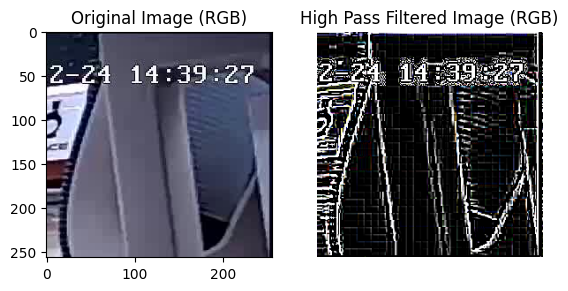

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

# Read the image using cv2
im = cv2.imread('./F922919VHHHH/sliced_frames/2023-1224-143928.00301026.mp40001.jpg_0.jpg')
cv2.imshow('Original Image', im)

# Highpass filtering
im6 = imageio.imread('./F922919VHHHH/sliced_frames/2023-1224-143928.00301026.mp40001.jpg_0.jpg')
a1 = np.uint16(im6)

plt.figure(6)
plt.subplot(121)
plt.imshow(a1, cmap='gray')
plt.title('Original Image (RGB)')

# Highpass filtering parameters
ws = 5
pd = int((ws - 1) / 2)
start = ws - pd
lap = -1 * np.ones([ws, ws])
lap[pd, pd] = -1 * np.sum(np.ravel(lap)) - 1

# Pad the image
f = np.pad(a1, [(pd, pd), (pd, pd), (0, 0)], 'edge')
r, c, _ = f.shape  # Get the shape of the padded image
row, col, _ = a1.shape  # Get the shape of the original image
hpf = np.zeros([row, col, 3])  # Initialize the high-pass filtered image

# Highpass filtering loop
for i in range(start, r - pd):
    for j in range(start, c - pd):
        window = f[i - pd:i + pd + 1, j - pd:j + pd + 1]
        su = np.zeros(3)  # Initialize sum for each channel

        # Loop through channels
        for ch in range(3):
            for s in range(ws):
                for t in range(ws):
                    m = np.multiply(lap[s][t], window[s][t][ch])
                    su[ch] = np.add(su[ch], m)

        hpf[i - start - 1, j - start - 1] = su

out2 = np.clip(hpf, 0, 255)
plt.subplot(122)
plt.imshow(out2.astype(np.uint8))
plt.title('High Pass Filtered Image (RGB)')
plt.axis('off')
plt.show()


In [4]:
from PIL import Image

def get_image_info(image_path):
    # Open the image using Pillow
    img = Image.open(image_path)

    # Get image size (width, height) and number of channels
    size = img.size
    channels = len(img.getbands())

    return size, channels

# Example usage
image_path = './desktop/cyberpunk_ramen.jpeg'  # 이미지 파일 경로 설정
size, channels = get_image_info(image_path)

print(f"Image Size: {size}")
print(f"Number of Channels: {channels}")


Image Size: (1024, 576)
Number of Channels: 3


In [7]:
from PIL import Image
import os

def split_and_save_image(input_path, output_dir, target_size=(256, 256)):
    # 이미지 로드
    img = Image.open(input_path)

    # 원본 이미지 크기
    original_width, original_height = img.size

    # 타겟 사이즈로 이미지를 256x256 조각으로 자르기
    for i in range(0, original_width, target_size[0]):
        for j in range(0, original_height, target_size[1]):
            # 오른쪽, 아래의 부분이 타겟 사이즈보다 작을 경우 무시
            if i + target_size[0] <= original_width and j + target_size[1] <= original_height:
                # 조각 이미지 추출
                cropped_img = img.crop((i, j, i + target_size[0], j + target_size[1]))

                # 파일 이름 생성 (예: split_0_0.jpg, split_0_256.jpg, ...)
                file_name = f"split_{i}_{j}.jpg"

                # 조각 이미지 저장
                cropped_img.save(os.path.join(output_dir, file_name), "JPEG")

# 사용 예시
input_image_path = "./desktop/cyberpunk_ramen.jpeg"
output_directory = "./desktop"

split_and_save_image(input_image_path, output_directory)


# 동일 멀티미디어 프로세서 사용 기기 간 분류

## ANYKA

In [ ]:
from IPython.display import Image

In [27]:
## codes
import os
import subprocess
import random
import shutil

root_dir_whole = os.listdir('./')
root_dir_whole.pop(0)
root_dir_whole.pop(0)
root_dir_whole.pop(0)

print(root_dir_whole)
root_dir = root_dir_whole[0:4]

print(root_dir)

['F818026FNMEN', 'F893587LEKYS', 'F922919VHHHH', 'F938131TMEPS', 'for_graduate.ipynb', 'illegal_camera_dataset', 'illegal_camera_hpf_frame.tfrecord', 'small_dataset', 'Untitled7.ipynb']
['F818026FNMEN', 'F893587LEKYS', 'F922919VHHHH', 'F938131TMEPS']


In [12]:
for i in root_dir:
    cam_dir = os.listdir('D:/불법카메라데이터세트/ANYKA/데이터세트/{}'.format(i))
    mp4_list=cam_dir[0:4]
    for z in mp4_list:
        print('D:/불법카메라데이터세트/ANYKA/데이터세트/{}/{}'.format(i,z))
        subprocess.call('D:/ffmpeg/ffmpeg.exe -i D:/불법카메라데이터세트/ANYKA/데이터세트/{}/{} D:/불법카메라데이터세트/ANYKA/데이터세트/{}/original_frames/{}%4d.jpg'.format(i, z, i, z))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'D:/불법카메라데이터세트/ANYKA/데이터세트/F801582NVXJL'

In [28]:
from PIL import Image
import os

#좌상단에서 부터 분할 28개 출력

def left_top_split(input_path, output_dir, target_name, target_size=(256, 256)):
    # 이미지 로드
    img = Image.open(input_path)

    # 원본 이미지 크기
    original_width, original_height = img.size

    # 타겟 사이즈로 이미지를 256x256 조각으로 자르기
    for i in range(0, original_width, target_size[0]):
        for j in range(0, original_height, target_size[1]):
            # 오른쪽, 아래의 부분이 타겟 사이즈보다 작을 경우 무시
            if i + target_size[0] <= original_width and j + target_size[1] <= original_height:
                # 좌상단
                cropped_img = img.crop((i, j, i + target_size[0], j + target_size[1]))
                file_name = f"{target_name}_{i}_{j}.jpg"
                cropped_img.save(os.path.join(output_dir, file_name), "JPEG")

In [29]:
from PIL import Image
import os

#우상단에서부터 분할 28개 나옴

def right_top_split(image_path, output_dir, name, target_size=(256, 256)):
    # 이미지 열기
    img = Image.open(image_path)

    # 이미지의 너비와 높이 구하기
    width, height = img.size

    # 오른쪽 위에서 256x256 크기로 분할하기
    cropped_images = []
    for y in range(height // target_size[1]):
        for x in range(width // target_size[0]):
            top = y * target_size[1]
            right = width - x * target_size[0]
            bottom = top + target_size[1]
            left = right - target_size[0]
            
            box = (left, top, right, bottom)
            cropped_img = img.crop(box)
            cropped_images.append(cropped_img)

    # 분할된 이미지 저장
    for i, img in enumerate(cropped_images):
        img.save(f"{output_dir}/{name}_{i}.jpg")

In [13]:
import numpy as np
import imageio
import cv2

def high_pass_filter(input_path, output_path, ws=5):
    # Read the image using cv2
    im = cv2.imread(input_path)

    # Highpass filtering
    im6 = imageio.imread(input_path)
    a1 = np.uint16(im6)

    # Highpass filtering parameters
    pd = int((ws - 1) / 2)
    start = ws - pd
    lap = -1 * np.ones([ws, ws])
    lap[pd, pd] = -1 * np.sum(np.ravel(lap)) - 1

    # Pad the image
    f = np.pad(a1, [(pd, pd), (pd, pd), (0, 0)], 'edge')
    r, c, _ = f.shape  # Get the shape of the padded image
    row, col, _ = a1.shape  # Get the shape of the original image
    hpf = np.zeros([row, col, 3])  # Initialize the high-pass filtered image

    # Highpass filtering loop
    for i in range(start, r - pd):
        for j in range(start, c - pd):
            window = f[i - pd:i + pd + 1, j - pd:j + pd + 1]
            su = np.zeros(3)  # Initialize sum for each channel

            # Loop through channels
            for ch in range(3):
                for s in range(ws):
                    for t in range(ws):
                        m = np.multiply(lap[s][t], window[s][t][ch])
                        su[ch] = np.add(su[ch], m)

            hpf[i - start - 1, j - start - 1] = su

    out2 = np.clip(hpf, 0, 255)

    # Save the result image as a JPG file
    cv2.imwrite(output_path, out2.astype(np.uint8))

In [30]:
import numpy as np
import cv2

def high_pass_filter2(input_path, output_path, ws=5):
    # Read the image using cv2
    im = cv2.imread(input_path)

    # Highpass filtering parameters
    pd = (ws - 1) // 2
    lap = -1 * np.ones((ws, ws), dtype=np.float32)
    lap[pd, pd] = -1 * np.sum(lap) - 1

    # Pad the image
    f = cv2.copyMakeBorder(im, pd, pd, pd, pd, cv2.BORDER_REPLICATE)

    # Highpass filtering
    hpf = cv2.filter2D(f, -1, lap)

    # Clip and convert to uint8
    out = np.clip(hpf, 0, 255).astype(np.uint8)

    # Save the result image
    cv2.imwrite(output_path, out)

# Test the function


In [31]:
for i in root_dir:
    original_frame = os.listdir(f'./{i}/original_frames')
    video_file = os.listdir(f'./{i}/')[0:4]
    #print(i)    
    #print(video_file)
    target_0 = []
  
    target_1 = []

    target_2 = []

    target_3 = []

    for x in original_frame:
        if video_file[0] in x:
            if len(target_0) < 128: 
                target_0.append(x)

        elif video_file[1] in x:
            if len(target_1) < 128: 
                target_1.append(x)

        elif video_file[2] in x:
            if len(target_2) < 128: 
                target_2.append(x)
        
        elif video_file[3] in x:
            if len(target_3) < 128: 
                target_3.append(x)

    target = target_0 + target_1 + target_2 + target_3

    for y in range(len(target)):
        
        if y%2 == 1:
            left_top_split(f'./{i}/original_frames/{target[y]}',f'./small_dataset/{i}/sliced_frames/', target[y].replace("mp4", "").replace(".jpg",""))
        else:
            right_top_split(f'./{i}/original_frames/{target[y]}',f'./small_dataset/{i}/sliced_frames/', target[y].replace("mp4", "").replace(".jpg",""))
    
for i in root_dir:
    sliced_frames = os.listdir(f'./small_dataset/{i}/sliced_frames')

    for x in sliced_frames:
        high_pass_filter2(f'./small_dataset/{i}/sliced_frames/{x}', f'./small_dataset/{i}/{x}')
    
    

In [2]:


import os
from tqdm import tqdm
from glob import glob
import random
import tensorflow as tf


def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def make_example(img_str, source_id, filename):
    # Create a dictionary with features that may be relevant.
    feature = {'image/source_id': _int64_feature(source_id),
               'image/filename': _bytes_feature(filename),
               'image/encoded': _bytes_feature(img_str)}

    return tf.train.Example(features=tf.train.Features(feature=feature))


def main(dataset_path, output_path):
    samples = []
    print("Reading data list...")
    for id_name in tqdm(os.listdir(dataset_path)):
        img_paths = glob(os.path.join(dataset_path, id_name, '*.jpg'))
        for img_path in img_paths:
            filename = os.path.join(id_name, os.path.basename(img_path))
            samples.append((img_path, id_name, filename))
    random.shuffle(samples)

    print("Writing tfrecord file...")
    with tf.io.TFRecordWriter(output_path) as writer:
        for img_path, id_name, filename in tqdm(samples):
            tf_example = make_example(img_str=open(img_path, 'rb').read(),
                                      source_id=int(id_name),
                                      filename=str.encode(filename))
            writer.write(tf_example.SerializeToString())

main("./illegal_camera_dataset/", "illegal_camera_hpf_frame.tfrecord")


Reading data list...


100%|██████████| 4/4 [00:08<00:00,  2.15s/it]


Writing tfrecord file...


100%|██████████| 582400/582400 [1:19:09<00:00, 122.63it/s]


In [4]:
import os
from tqdm import tqdm
from glob import glob
import random
import tensorflow as tf

In [5]:
def _parse_tfrecord():
    def parse_tfrecord(tfrecord):
        features = {'image/source_id': tf.io.FixedLenFeature([], tf.int64),
                    'image/filename': tf.io.FixedLenFeature([], tf.string),
                    'image/encoded': tf.io.FixedLenFeature([], tf.string)}
        x = tf.io.parse_single_example(tfrecord, features)
        x_train = tf.image.decode_jpeg(x['image/encoded'], channels=3)

        y_train = tf.cast(x['image/source_id'], tf.float32)
        x_train = _transform_images()(x_train)
        y_train = _transform_targets(y_train)
        return (x_train, y_train), y_train
    return parse_tfrecord


def _transform_images():
    def transform_images(x_train):
        #x_train = tf.image.resize(x_train, (128, 128))
        #x_train = tf.image.random_crop(x_train, (112, 112, 3))
        #x_train = tf.image.random_flip_left_right(x_train)
        #x_train = tf.image.random_saturation(x_train, 0.6, 1.4)
        #x_train = tf.image.random_brightness(x_train, 0.4)
        x_train = x_train / 255
        return x_train
    return transform_images


def _transform_targets(y_train):
    return y_train

In [6]:
def load_tfrecord_dataset(tfrecord_name, batch_size, shuffle=True, buffer_size=10240):
    """load dataset from tfrecord"""
    raw_dataset = tf.data.TFRecordDataset(tfrecord_name)
    raw_dataset = raw_dataset.repeat()
    if shuffle:
        raw_dataset = raw_dataset.shuffle(buffer_size=buffer_size)
    dataset = raw_dataset.map(
        _parse_tfrecord(),
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [7]:
tf_record = load_tfrecord_dataset("./illegal_camera_hpf_frame.tfrecord", batch_size=128)
tf_record = iter(tf_record)

In [11]:
arsed_mnist = load_tfrecord_dataset("./illegal_camera_hpf_frame.tfrecord")

for img, label in parsed_mnist.take(1):
    plt.imshow(img[0])
    plt.title(label[0].numpy())

InvalidArgumentError: Feature: image (data type: string) is required but could not be found.
	 [[{{node ParseSingleExample/ParseExample/ParseExampleV2}}]] [Op:IteratorGetNext]

In [8]:
def _parse_tfrecord(tfrecord):
    feature_desc = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64)
    }
    x = tf.io.parse_single_example(tfrecord, feature_desc)
    image = tf.reshape(tf.io.decode_raw(x["image"], tf.uint8), [256, 256])
    label = x["label"]
    return image, label

In [9]:
def load_tfrecord_dataset(filename, batch_size=32, shuffle=True, buffer_size=10000, repeat=1):
    mnist_dataset = tf.data.TFRecordDataset(filename)
    mnist_dataset = mnist_dataset.repeat(repeat)
    if shuffle:
        mnist_dataset = mnist_dataset.shuffle(buffer_size=buffer_size)
    parsed_mnist = mnist_dataset.map(_parse_tfrecord, 
                                     num_parallel_calls=tf.data.experimental.AUTOTUNE)
    parsed_mnist = parsed_mnist.batch(batch_size)
    return parsed_mnist.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [10]:
parsed_mnist = load_tfrecord_dataset("./illegal_camera_hpf_frame.tfrecord")

for img, label in parsed_mnist.take(1):
    plt.imshow(img[0])
    plt.title(label[0].numpy())

InvalidArgumentError: Feature: image (data type: string) is required but could not be found.
	 [[{{node ParseSingleExample/ParseExample/ParseExampleV2}}]] [Op:IteratorGetNext]

In [1]:
## codes
import os.path
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch import optim
from torch.utils.data import DataLoader as D
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # use GPU or CPU
print('Using {} device'.format(device))

# dataset path
image_path = './illegal_camera_dataset/'
batch_size = 128  # batch size
torch.manual_seed(42)  #  set random seed to ensure the same split everytime

# data preprocessing
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # resize image
    transforms.CenterCrop(256),  # clip image from center
    transforms.RandomHorizontalFlip(),  # random horizontal flip
    transforms.RandomRotation(10),  # random rotation
    transforms.ToTensor(),  # transform to tensor
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),  # resize image
    transforms.CenterCrop(256),  # clip image from center
    transforms.ToTensor(),  # transform to tensor
])

dataset = ImageFolder(image_path)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(len(dataset) * 0.8),
                                                                                   int(len(dataset) * 0.1),
                                                                                   int(len(dataset) * 0.1)])
train_dataset.dataset.transform = transform
val_dataset.dataset.transform = transform_test

# data loader
train_loader = D(train_dataset, batch_size=batch_size, shuffle=True)  # random shuffle
val_loader = D(val_dataset, batch_size=batch_size, shuffle=False)  # not shuffle
test_loader = D(test_dataset, batch_size=batch_size, shuffle=False)  # not shuffle

Using cpu device


Image shape: torch.Size([3, 256, 256])
Image label: tensor(0)
Image data type: torch.float32


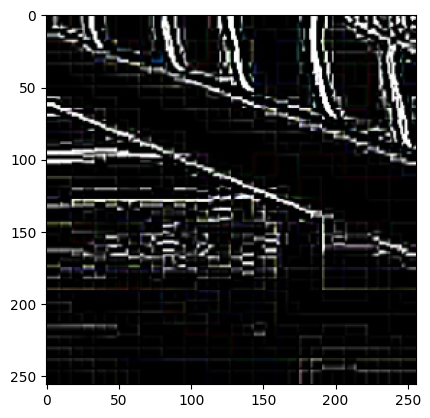

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# get the first batch
images, labels = next(iter(train_loader))

# get the first image
image = images[0]
label = labels[0]

# print the shape, label, dtype of the image
print("Image shape:", image.shape)
print("Image label:", label)
print("Image data type:", image.dtype)

# transform tensor to numpy array
image_np = image.numpy().transpose(1, 2, 0)
# transform [0, 1] to [0, 255]
image_np = np.clip(image_np, 0, 1)

# show image
plt.imshow(image_np)
plt.show()

In [3]:
import os
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

In [4]:
# Define the transforms
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
# Create the dataset
trainset = datasets.ImageFolder("./small_dataset/", transform=transform)
dataset_length = len(trainset)

# Split the dataset into training and validation sets
training_data, validation_data = random_split(trainset, [int(0.8 * dataset_length), dataset_length - int(0.8 * dataset_length)])
print("Total Classes: ",len(trainset.classes))
# Create data loaders
trainloader = DataLoader(training_data, batch_size=128, shuffle=True, num_workers=4)
testloader = DataLoader(validation_data, batch_size=128, shuffle=True, num_workers=4)
num_epochs = 50
best_acc = 0.0  # Variable to store the best accuracy on the validation set

Total Classes:  4


In [35]:
# Load the pretrained AlexNet model
model = models.alexnet(pretrained=True)

# Modify the classifier to match the number of classes
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, len(trainset.classes))

# Move the model to GPU
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # Training accuracy for the epoch
    train_accuracy = correct_train / total_train

    # Evaluate the model on the validation set
    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    # Validation accuracy for the epoch
    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}, Training Accuracy: {100 * train_accuracy:.8f}% ({correct_train}/{total_train}), Validation Accuracy: {100 * val_accuracy:.8f}% ({correct_val}/{total_val})')

    # Save the model if it has the best accuracy so far
    if val_accuracy > best_acc:
        best_acc = val_accuracy
        torch.save(model.state_dict(), 'small_best_model_alexnet.pth')

print('Finished Training')

[1,   100] loss: 1.305
[1,   200] loss: 1.187
[1,   300] loss: 1.112
[1,   400] loss: 1.048
[1,   500] loss: 1.006
[1,   600] loss: 0.966
[1,   700] loss: 0.908
Epoch 1, Training Accuracy: 52.20490463% (47898/91750), Validation Accuracy: 65.54625512% (15035/22938)
[2,   100] loss: 0.867
[2,   200] loss: 0.844
[2,   300] loss: 0.823
[2,   400] loss: 0.796
[2,   500] loss: 0.776
[2,   600] loss: 0.747
[2,   700] loss: 0.724
Epoch 2, Training Accuracy: 66.53514986% (61046/91750), Validation Accuracy: 74.79727962% (17157/22938)
[3,   100] loss: 0.709
[3,   200] loss: 0.685
[3,   300] loss: 0.667
[3,   400] loss: 0.656
[3,   500] loss: 0.638
[3,   600] loss: 0.626
[3,   700] loss: 0.621
Epoch 3, Training Accuracy: 73.09100817% (67061/91750), Validation Accuracy: 78.35033569% (17972/22938)
[4,   100] loss: 0.592
[4,   200] loss: 0.592
[4,   300] loss: 0.569
[4,   400] loss: 0.572
[4,   500] loss: 0.566
[4,   600] loss: 0.555
[4,   700] loss: 0.551
Epoch 4, Training Accuracy: 76.59509537% (70

In [36]:
# Load the best model
best_model = models.alexnet(pretrained=False)  # Load a fresh instance of AlexNet
num_features = best_model.classifier[6].in_features
best_model.classifier[6] = nn.Linear(num_features, len(trainset.classes))  # Modify the last layer to match the number of classes
best_model.load_state_dict(torch.load('small_best_model_alexnet.pth'))
best_model = best_model.to(device)

best_model.eval()  # Set the model to evaluation mode
correct_test = 0
total_test = 0

# Evaluate the model on the test set
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, predicted_test = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

# Test accuracy
test_accuracy = correct_test / total_test
print(f'Test Accuracy: {100 * test_accuracy:.2f}% ({correct_test}/{total_test})')


c:\Users\jsj97\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 93.94% (21549/22938)


In [5]:
#동일 기종 다른 카메라에 대한 검증

from PIL import Image
import random

def select_random_elements(input_list, num_elements=10000):
    return random.sample(input_list, num_elements)

def predict_image(image_path, model, transform):
    # Open the image
    image = Image.open(image_path)
    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add a batch dimension
    image = image.to(device)  # Move to GPU if available
    # Make prediction
    with torch.no_grad():
        model.eval()  # Set the model to evaluation mode
        output = model(image)
        _, predicted = torch.max(output, 1)
        # Get the predicted label
        predicted_label = trainset.classes[predicted.item()]
    return predicted_label

# Load the best model
best_model = models.alexnet(pretrained=False)  # Load a fresh instance of AlexNet
num_features = best_model.classifier[6].in_features
best_model.classifier[6] = nn.Linear(num_features, len(trainset.classes))  # Modify the last layer to match the number of classes
best_model.load_state_dict(torch.load('small_best_model_alexnet.pth'))
best_model = best_model.to(device)

# Define the transformation to be applied to the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


c:\Users\jsj97\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jsj97\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


F893587LEKYS(train, validation, test에 사용)와 같은 기종인 
F801582NVXJL(train, validation, test에 일체 관여 X) 기종에 대한 적중률 실험

In [6]:

#
target = os.listdir("D:/illegal_camera_dataset/ANYKA/data_set/F801582NVXJL-for_test/")

print("10000개 고르는 중")

random_elements = select_random_elements(target)
correct=0

print("이미지 분석 중")
for image_path in random_elements:
# Predict the label
    predicted_label = predict_image(f"D:/illegal_camera_dataset/ANYKA/data_set/F801582NVXJL-for_test/{image_path}", best_model, transform)
    if predicted_label == "F893587LEKYS":
        correct+=1

print(correct)

10000개 고르는 중
이미지 분석 중
3922


train, validation, test에 사용되지 않은 신규 영상에 대한 적중률 실험 

In [10]:
target = os.listdir("D:/illegal_camera_dataset/ANYKA/F893587LEKYS/hpf_frames")

print("10000개 고르는 중")

random_elements = select_random_elements(target)
correct=0

print("이미지 분석 중")
for image_path in random_elements:
# Predict the label
    predicted_label = predict_image(f"D:/illegal_camera_dataset/ANYKA/F893587LEKYS/hpf_frames/{image_path}", best_model, transform)
    if predicted_label == "F893587LEKYS":
        correct+=1

print(correct)


10000개 고르는 중
이미지 분석 중
1055
